# MNIST SVD Classification
Follows Chapter 11 of Matrix Methods in Data Mining and Pattern Recognition by Lars Elden,
with added dimensionality reduction visualization
#### Author: Daniel Yan
#### Email: daniel.yan@vanderbilt.edu

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


# Load Data

Load in Keras dataset

In [2]:
# Load in mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Reshape to each image to a row vector and column vector
x_train_rowvector = np.reshape(x_train, (-1, 28*28))
x_train_colvector = np.copy(x_train_rowvector).T
x_test_rowvector = np.reshape(x_test, (-1, 28*28))
x_test_colvector = np.copy(x_test_rowvector).T
# Take small sample of 2000 training images
x_train_colvector_sample2000 = x_train_colvector[:, :2000]
y_train_sample2000 = y_train[:2000]
# Take small sample of 200 testing images
x_test_colvector_sample200 = x_test_colvector[:, :200]
y_test_sample200 = y_test[:200]

# Visualize Examples

Label:  5


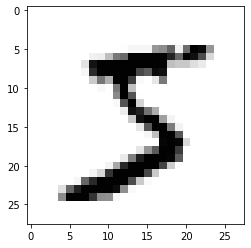

Label:  0


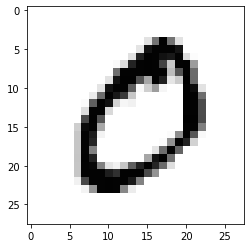

Label:  4


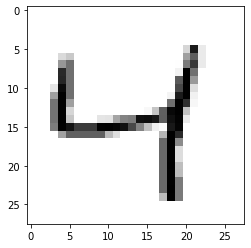

Label:  1


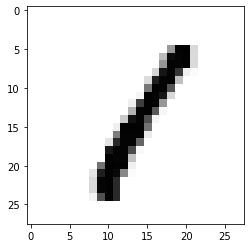

Label:  9


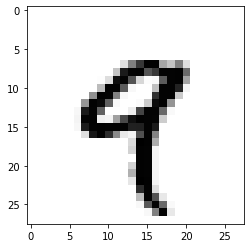

In [3]:
# Visualize a few samples
for i in range(5):
    print("Label: ", y_train[i])
    image = x_train_colvector[:, i]
    plt.imshow(image.reshape(28, 28), cmap="Greys")
    plt.show()
    plt.close()

# PCA Visualization
Credits: https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

In [4]:
# Calculate the covariance matrix
covariance = np.cov(x_train_colvector_sample2000)

In [5]:
# Calculate the eigenvalues and the eigenvectors for the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance)

In [6]:
# Get the real part of the eigenvalues and eigenvectors only
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

In [7]:
# Project original data onto eigenvectors
pca = np.dot(x_train_colvector_sample2000.T, eigenvectors)
# Get only the first two columns for the first two principal components
pca = pca[:, 0:2]

Sort by label

In [8]:
pca_list= [0] * 10
y_list = [0] * 10
for i in range(10):
    pca_list[i] = (pca[y_train_sample2000 == i])
    y_list[i] = (y_train_sample2000[y_train_sample2000 == i])

Plot each label separately on graph

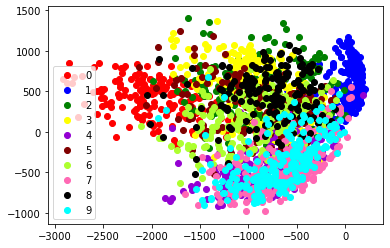

In [9]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    pca_current_label = pca_list[i]
    ax.scatter(pca_current_label[:, 0], pca_current_label[:, 1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()                   

Calculate and plot the mean for each digit in PCA coordinates

In [10]:
pca_mean_list = [0] * 10
for i in range(10): 
    pca_mean_list[i] = np.mean(pca_list[i], axis=0)

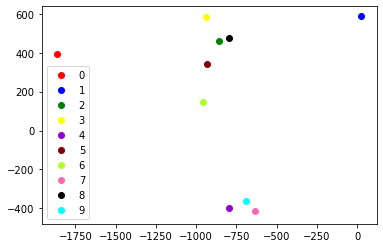

In [11]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    pca_current_label = pca_mean_list[i]
    ax.scatter(pca_current_label[0], pca_current_label[1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()  


# SVD Visualization
Compare the PCA visualization with SVD dimensionality reduction

Calculate SVD and use dimensionality reduction to get down to 2 coordinates

In [12]:
# Calculate u, s, v
u, s, v = np.linalg.svd(x_train_colvector_sample2000, full_matrices=False)
# Set all singular values greater than the first two to 0
for i in range(2, s.shape[0]):
    s[i] = 0
# Calculate the reduced dimensions with svd
svd_cords = np.diag(s) @ v

Sort by label

In [13]:
svd_list= [0] * 10
for i in range(10):
    svd_list[i] = (svd_cords.T[y_train_sample2000 == i])

Plot the SVD coordinates

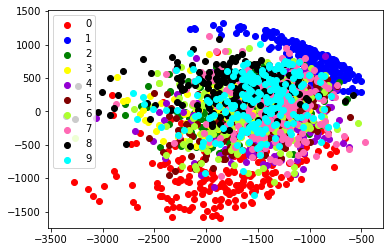

In [14]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    svd_current_label = svd_list[i]
    ax.scatter(svd_current_label[:, 0], svd_current_label[:, 1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()  

Calculate and plot the mean for each digit in SVD coordinates


In [15]:
svd_mean_list = [0] * 10
for i in range(10): 
    svd_mean_list[i] = np.mean(svd_list[i], axis=0)

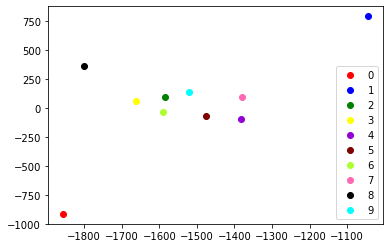

In [16]:
COLORS = ["red", "blue", "green", "yellow", "darkviolet", 
          "maroon", "greenyellow", "hotpink", "black", "cyan"]
fig, ax = plt.subplots()
for i in range(10):
    # Get the pca array corresponding to the current label
    svd_current_label = svd_mean_list[i]
    ax.scatter(svd_current_label[0], svd_current_label[1],
               c=COLORS[i], label=str(i))

ax.legend()
plt.show()  

# Sorting Training Digits By Label

Sort the training images by label

In [17]:
x_list= [0] * 10
y_list = [0] * 10
for i in range(10):
    # Get x and y values in each label by the coordinate in the list
    x_list[i] = (x_train_colvector[:, y_train == i])
    y_list[i] = (y_train[y_train == i])

# Mean Clustering Classification

Calculate the Mean Image for Each Digit

In [18]:
means_list = [0] * 10
for i in range(10):
    means_list[i] = np.mean(x_list[i], axis=1)

Visualize the Mean Image for Each Digit

Mean Image for Digit 0


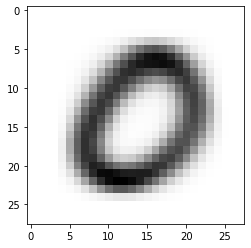

Mean Image for Digit 1


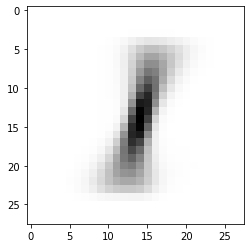

Mean Image for Digit 2


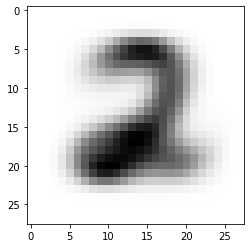

Mean Image for Digit 3


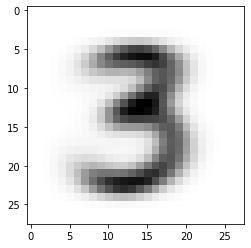

Mean Image for Digit 4


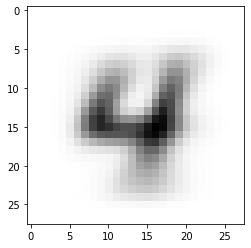

Mean Image for Digit 5


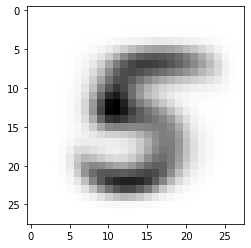

Mean Image for Digit 6


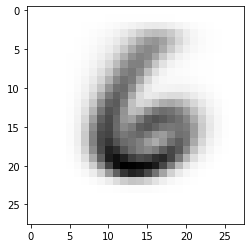

Mean Image for Digit 7


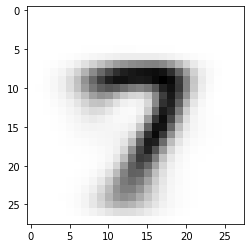

Mean Image for Digit 8


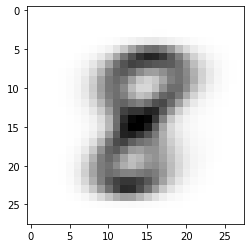

Mean Image for Digit 9


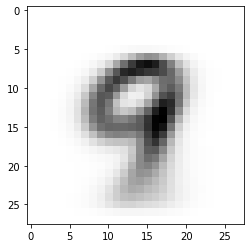

In [19]:
for i in range(10):
    print("Mean Image for Digit", i)
    image = means_list[i]
    # Show singular image
    plt.imshow(image.reshape(28, 28), cmap="Greys")
    plt.show()
    plt.close()

Classify Each Unknown Digit by the Mean Image

In [20]:
# Create vector for y predictions
y_pred = np.zeros(len(y_test_sample200))
# Iterate through all the testing images and make a prediction
for i in range(len(y_pred)):
    # Get the unknown digit
    x = x_test_colvector_sample200[:, i]
    # Calculate the residual of the digit to each of the mean digits
    residuals = np.zeros(10)
    for j in range(10):
        # Calculate residual, 
        residuals[j] = np.linalg.norm(means_list[j] - x, ord=2)
    # Find the minimum residual and store as prediction
    y_pred[i] = np.argmin(residuals)

Calculate the accuracy score

In [21]:
correct = np.where(y_pred == y_test_sample200, 1, 0)
print("Accuracy For Mean Digit: ", np.sum(correct) / len(correct))

Accuracy For Mean Digit:  0.83


# SVD Singular Images Visualization

Compute Top 3 Singular Images for each digit and visualize

#################################################################
#################################################################
Visualizing Singular Images for 0
#################################################################
#################################################################
Visualizing Singular Image Number 1


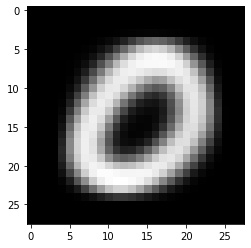

Visualizing Singular Image Number 2


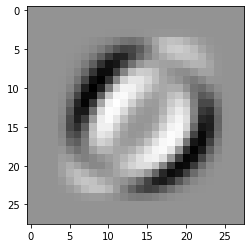

Visualizing Singular Image Number 3


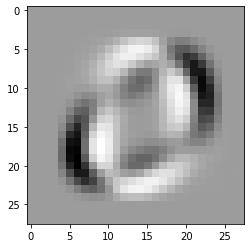

#################################################################
#################################################################
Visualizing Singular Images for 1
#################################################################
#################################################################
Visualizing Singular Image Number 1


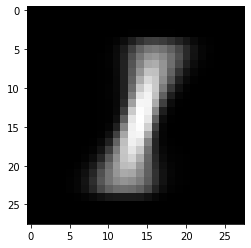

Visualizing Singular Image Number 2


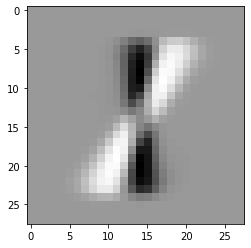

Visualizing Singular Image Number 3


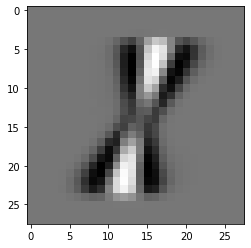

#################################################################
#################################################################
Visualizing Singular Images for 2
#################################################################
#################################################################
Visualizing Singular Image Number 1


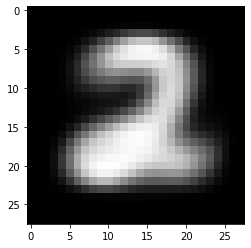

Visualizing Singular Image Number 2


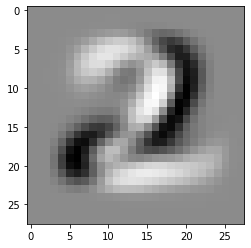

Visualizing Singular Image Number 3


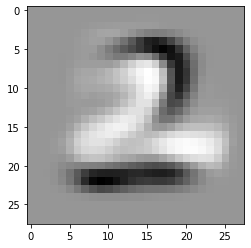

#################################################################
#################################################################
Visualizing Singular Images for 3
#################################################################
#################################################################
Visualizing Singular Image Number 1


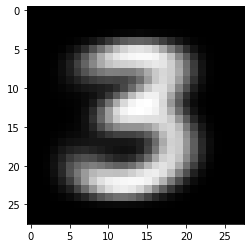

Visualizing Singular Image Number 2


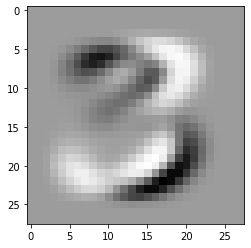

Visualizing Singular Image Number 3


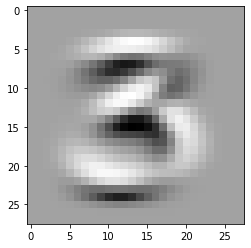

#################################################################
#################################################################
Visualizing Singular Images for 4
#################################################################
#################################################################
Visualizing Singular Image Number 1


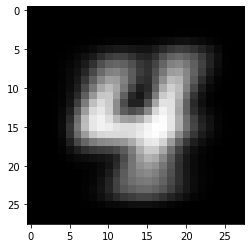

Visualizing Singular Image Number 2


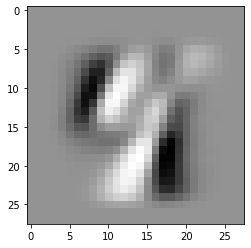

Visualizing Singular Image Number 3


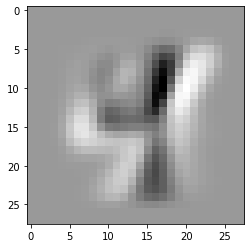

#################################################################
#################################################################
Visualizing Singular Images for 5
#################################################################
#################################################################
Visualizing Singular Image Number 1


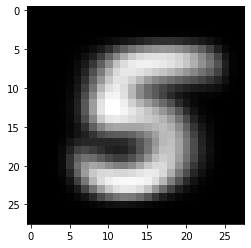

Visualizing Singular Image Number 2


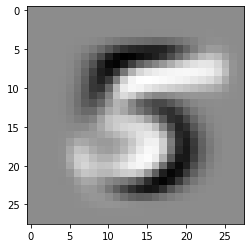

Visualizing Singular Image Number 3


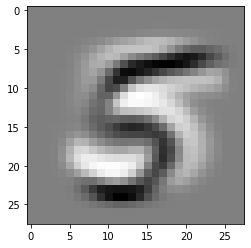

#################################################################
#################################################################
Visualizing Singular Images for 6
#################################################################
#################################################################
Visualizing Singular Image Number 1


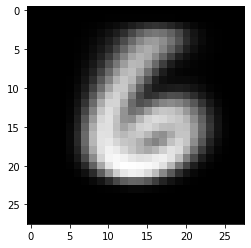

Visualizing Singular Image Number 2


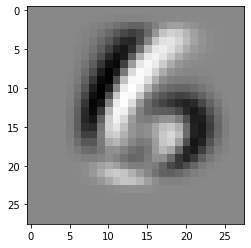

Visualizing Singular Image Number 3


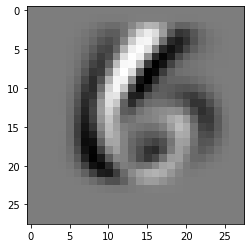

#################################################################
#################################################################
Visualizing Singular Images for 7
#################################################################
#################################################################
Visualizing Singular Image Number 1


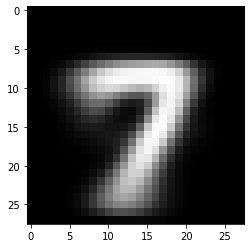

Visualizing Singular Image Number 2


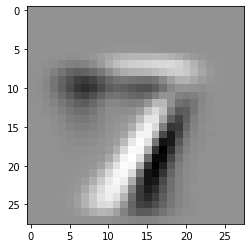

Visualizing Singular Image Number 3


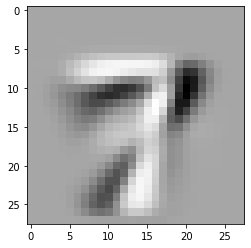

#################################################################
#################################################################
Visualizing Singular Images for 8
#################################################################
#################################################################
Visualizing Singular Image Number 1


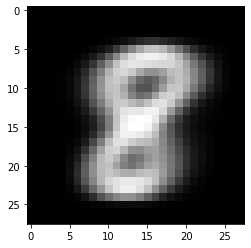

Visualizing Singular Image Number 2


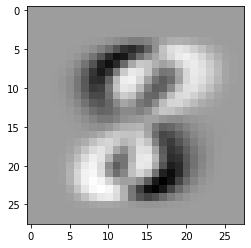

Visualizing Singular Image Number 3


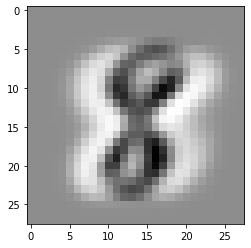

#################################################################
#################################################################
Visualizing Singular Images for 9
#################################################################
#################################################################
Visualizing Singular Image Number 1


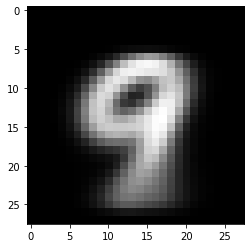

Visualizing Singular Image Number 2


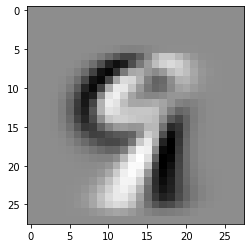

Visualizing Singular Image Number 3


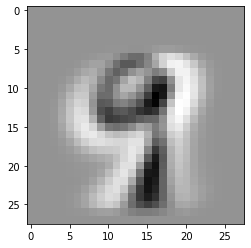

In [22]:
# Iterate through all the digits
for i in range(10):
    print("#################################################################")
    print("#################################################################")
    print("Visualizing Singular Images for " + str(i))
    print("#################################################################")
    print("#################################################################")
    # Calculate the SVD for that digit
    u, s, v = np.linalg.svd(x_list[i], full_matrices=False)
    # Visualize the first three singular images
    for j in range(3):
        print("Visualizing Singular Image Number " + str(j + 1))
        # Get the singular image    
        image = u[:, j]
        # Show singular image
        plt.imshow(image.reshape(28, 28), cmap="Greys")
        plt.show()
        plt.close()

# SVD Singular Image Classification

Compute the Singular Value Decomposition for each digit

In [23]:
u_list = [0] * 10
s_list = [0] * 10
v_list = [0] * 10
# Iterate through each digit
for i in range(10):
    # Calculate the SVD for that digit
    u_list[i], s_list[i], v_list[i] = np.linalg.svd(x_list[i], full_matrices=False)

Calculate the Accuracy for Different Number of Singular Images

In [24]:
# Store predictions and accuracy at different number of singular images used
acc_list = [0] * 5
pred_list = [0] * 5
# Use only the first k basis image for classification
for k in range(5):
    # List to store the values of uk @ uk.T to get the singular images sum
    uk_ukt_list = [0] * 10
    # Iterate through all digits and calculate uk @ uk.T for that digit
    for i in range(10):
        uk = np.zeros((784, 784))
        uk[:,0:k+1] = u_list[i][:, 0:k+1]
        uk_ukt_list[i] = uk @ uk.T
    # Iterate through the testing images and get the prediction for each image
    # Initialize predictions to 0
    y_pred = np.zeros(len(y_test_sample200))
    # Iterate through all the testing images
    for i in range(len(y_pred)):
        # Get the unknown digit
        x = x_test_colvector_sample200[:, i]
        # Calculate the residual of the digit to each of the singular bases
        residuals = np.zeros(10)
        # Iterate through the 10 singular bases
        for j in range(10):
            # Calculate residual, which is norm of (I - uk @ uk.T) @ z 
            residuals[j] = np.linalg.norm((np.identity(28*28) - uk_ukt_list[j]) @ x, ord=2)
        # Find the minimum residual and store that as the predicted digit
        y_pred[i] = np.argmin(residuals)
    # Store all the predictions for this threshold
    pred_list[k] = y_pred
    # Calculate and store the accuracy for this threshold
    correct = np.where(y_pred == y_test_sample200, 1, 0)
    accuracy = np.sum(correct) / len(correct)
    print("Accuracy with", k + 1, "singular images: ", accuracy)
    acc_list[k] = accuracy

Accuracy with 1 singular images:  0.81
Accuracy with 2 singular images:  0.9
Accuracy with 3 singular images:  0.94
Accuracy with 4 singular images:  0.95
Accuracy with 5 singular images:  0.945


# Confusion Matrix Visualization at Each Number of Singular Images
Visualize a confusion matrix at each number of singular images 

Confusion Matrix at 1 singular images


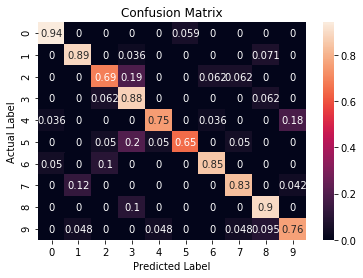

Confusion Matrix at 2 singular images


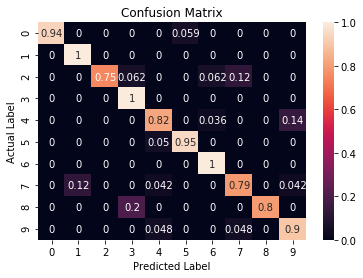

Confusion Matrix at 3 singular images


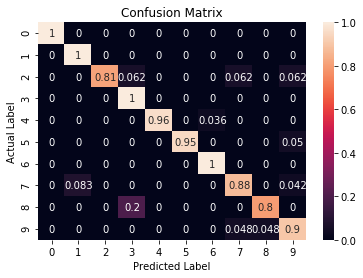

Confusion Matrix at 4 singular images


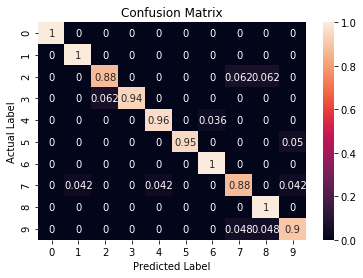

Confusion Matrix at 5 singular images


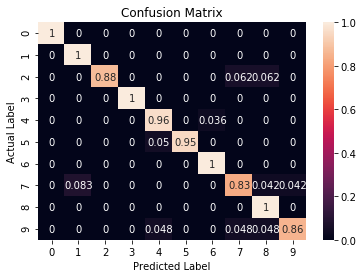

In [26]:
import seaborn
from sklearn import metrics

for k in range(5):
    print("Confusion Matrix at", k + 1, "singular images")
    # Use scikit-learn to calculate confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test_sample200, pred_list[k], normalize="true")
    # Use seaborn to plot heatmap
    axes = seaborn.heatmap(confusion_matrix, annot=True)
    axes.set(xlabel="Predicted Label", ylabel="Actual Label", title="Confusion Matrix")
    # Save as image and show plot.
    plt.show()
    plt.close()